# Digits Image Classification

Hello GDSC members to our first mini-project, digits classification with KNN.

In [21]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets

## Load the digits dataset

In [2]:
X, y = datasets.load_digits(return_X_y=True)


# Write your code here to print the shapes of X and y and print unique values of y
##################################################################################

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')
print(f'Unique labels: {np.unique(y)}')

##################################################################################

X shape: (1797, 64)
y shape: (1797,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


What's the number of images in our dataset?

## Get to know our data

In [3]:
# check for nan in our data. If there are any, replace them with zeros
#################################################################################

print(f'Number of missing values in the images: {np.isnan(X).sum()}')
print(f'Number of missing values in the labels: {np.isnan(y).sum()}')

#################################################################################

Number of missing values in the images: 0
Number of missing values in the labels: 0


Are our classes balanced?

In [5]:
n_images = X.shape[0]

# Check if our classes are balanced by checking the distribution of our labels
##############################################################################

values, counts = np.unique(y, return_counts=True)
percentages = counts / n_images * 100

for value, percentage in zip(values, percentages):
    print(f'Label {value}: {percentage:.2f}% of data')

##############################################################################

Label 0: 9.91% of data
Label 1: 10.13% of data
Label 2: 9.85% of data
Label 3: 10.18% of data
Label 4: 10.07% of data
Label 5: 10.13% of data
Label 6: 10.07% of data
Label 7: 9.96% of data
Label 8: 9.68% of data
Label 9: 10.02% of data


Let's vizualize a small sample of our dataset

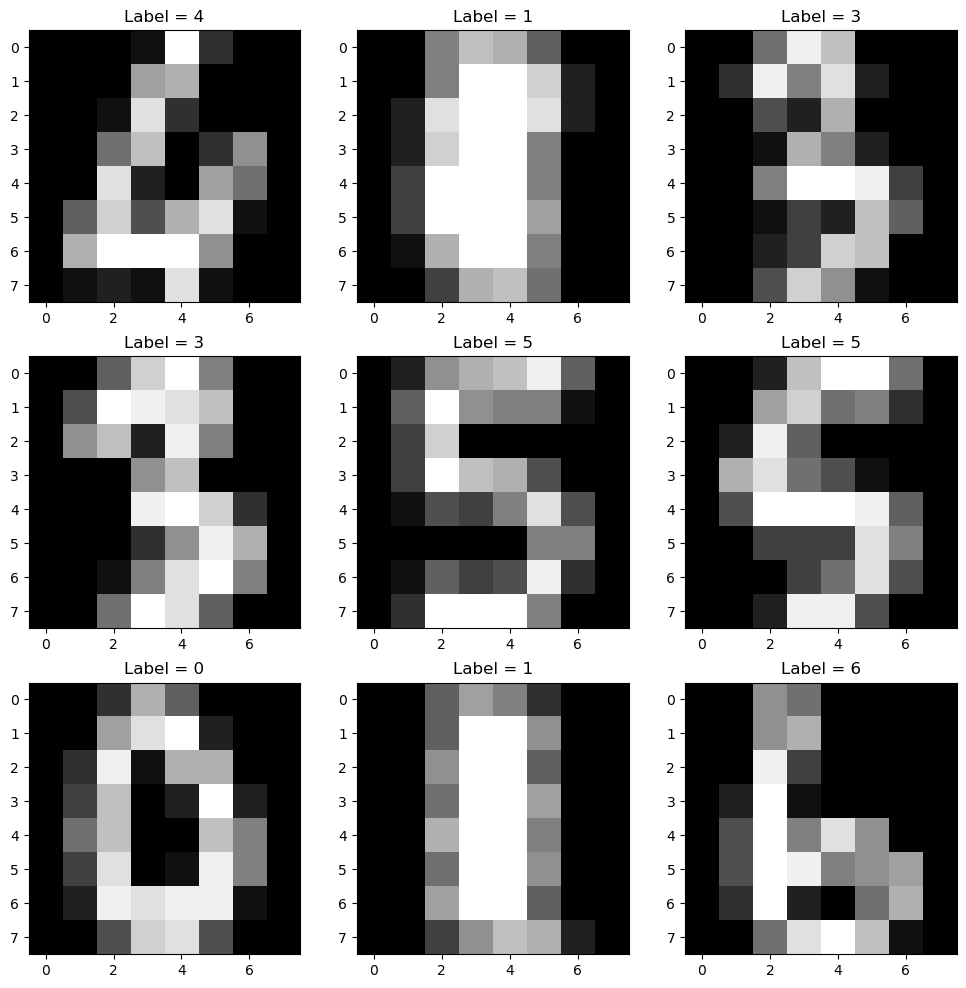

In [6]:
# The variable indexes is an ndarray with shape (9,) containing random integers from 0 to n_images
##################################################################################################

n_images = X.shape[0]
indexes = np.random.randint(0, n_images, (9,))

##################################################################################################

sample_images = X[indexes].reshape((9, 8, 8))   # reshape to get 8 x 8 images because they have been flattened
sample_labels = y[indexes]

plt.figure(figsize=(12, 12))
for i, (image, label) in enumerate(zip(sample_images, sample_labels), 1):
    plt.subplot(3, 3, i)
    plt.title(f'Label = {label}')
    plt.imshow(image, cmap='gray')
plt.show()
    

Data vizualization is hard when we have 64 features. If only there were a way to map them to only two features!

### PCA (Principal Components Analysis): unsupervised learning technique for dimensionality reduction

Principal component analysis is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data.

Definition source: https://en.wikipedia.org/wiki/Principal_component_analysis

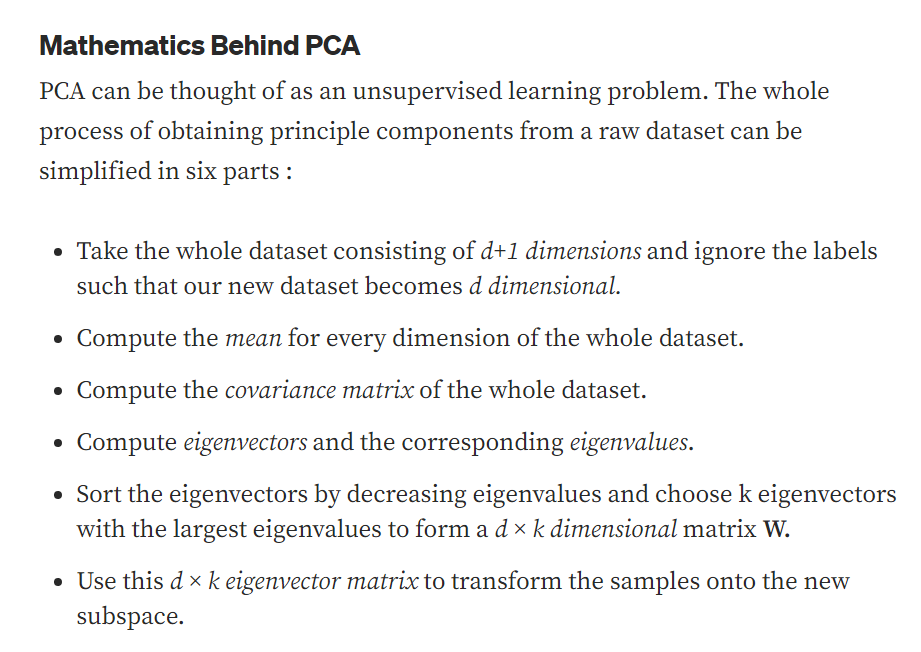

Image source: https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643

In [40]:
# Follow the 5 first steps of PCA to obtain the matrix W
####################################################################

k = 2         # Number of dimensions
images_mean = X.mean(axis=0)
cov_matrix = np.cov(X.T)
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
sorted_eigen_vectors = eigen_vectors[eigen_values.argsort()[::-1]]
W = sorted_eigen_vectors[:, :k]
####################################################################

In [43]:
base_cmap_list = list(matplotlib.cm.cmap_d.keys())
print(base_cmap_list)

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

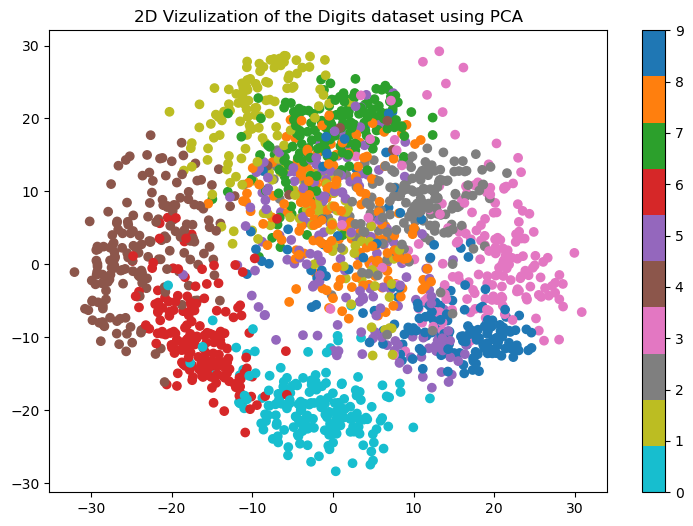

In [45]:
# Thank you jakevdp! https://gist.github.com/jakevdp/91077b0cae40f8f8244a

def discrete_cmap(n, base_cmap=None):
    """Create an n-bin discrete colormap from the specified input map"""

    # The following works for string, None, or a colormap instance

    base = matplotlib.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, n))
    cmap_name = base.name + str(n)
    return matplotlib.colors.LinearSegmentedColormap.from_list(cmap_name, color_list, n)


base_cmap = 'tab10_r'    # Choose any cmap from base_cmap_list

X_transformed = X.dot(W)    # Use tha matrix W to transform the samples onto the new subspace

plt.figure(figsize=(9, 6))
plt.title('2D Vizulization of the Digits dataset using PCA')
scatter_plot = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap=discrete_cmap(10, base_cmap))
plt.colorbar(ticks=range(10))
plt.show()

## Model Training

Now we split our data to training and testing set, for that we can use sklearn's train_test_split.

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)


# How many images are there our training set and in our testing set?
#################################################################################
print(f'We have {X_train.shape[0]} images in the training set and {X_test.shape[0]} images in the testing set.')
#################################################################################

We have 1437 images in the training set and 360 images in the testing set.


In [53]:
# Check if our training set and testing set have similar distributions
# If they are not similar, try changing the random_state parameter in the train_tests_split function
#################################################################################

def get_distribution(y):
    n_images = y.shape[0]
    values, counts = np.unique(y, return_counts=True)
    percentages = counts / n_images * 100
    return values, percentages

def show_distribution(values, percentages):
    for value, percentage in zip(values, percentages):
        print(f'Label {value}: {percentage:.2f} %')

train_values, train_percentages = get_distribution(y_train)
test_values, test_percentages = get_distribution(y_test)

print('Training set distribution:')
show_distribution(train_values, train_percentages)

print('\nTesting set distribution:')
show_distribution(test_values, test_percentages)

#################################################################################


Training set distribution:
Label 0: 9.74 %
Label 1: 10.37 %
Label 2: 9.67 %
Label 3: 10.23 %
Label 4: 9.88 %
Label 5: 9.95 %
Label 6: 10.09 %
Label 7: 10.16 %
Label 8: 10.16 %
Label 9: 9.74 %

Testing set distribution:
Label 0: 10.56 %
Label 1: 9.17 %
Label 2: 10.56 %
Label 3: 10.00 %
Label 4: 10.83 %
Label 5: 10.83 %
Label 6: 10.00 %
Label 7: 9.17 %
Label 8: 7.78 %
Label 9: 11.11 %


In [100]:
# We can use sklearn's KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f'Our model\'s accuracy is {accuracy*100:.2f}%')

Our model's accuracy is 98.61%
